In [ ]:
 #################### SAM ####
!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

  Preparing metadata (setup.py) ... done


In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 22.7 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
!mkdir -p {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg -P {HOME}/data

In [ ]:
###
!mkdir -p {HOME}/season1

!gdown https://drive.google.com/uc?id=1v4u-LkwDjeusDbtbLifRBagjem9V_3Xr
!unzip -qq season_1.zip -d {HOME}/season1
####

Downloading...
From: https://drive.google.com/uc?id=1v4u-LkwDjeusDbtbLifRBagjem9V_3Xr
To: /content/season_1.zip
100% 8.92M/8.92M [00:00<00:00, 11.5MB/s]


In [ ]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
import os

IMAGE_NAME = "dog.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

In [ ]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


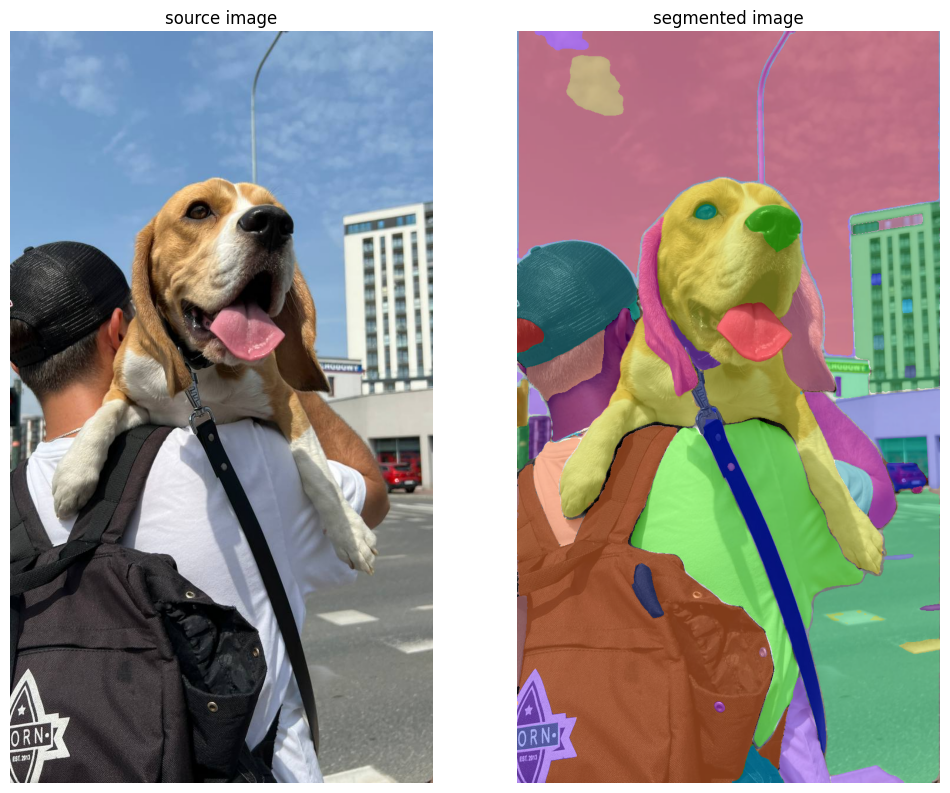

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
IMAGE_PATH = "/content/sample_02.jpg"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
sam_result = mask_generator.generate(image_rgb)

In [ ]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


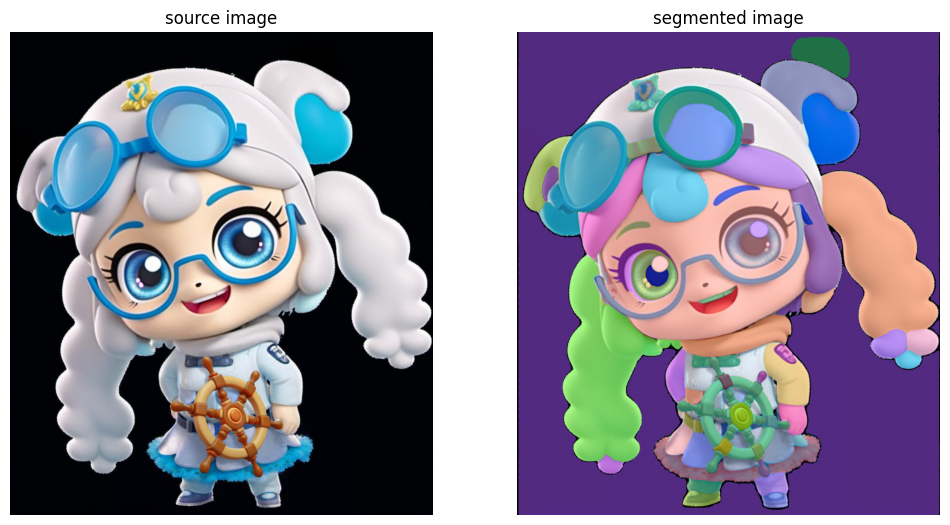

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
sam_result

[{'segmentation': array([[False, False, False, ...,  True, False, False],
         [False, False, False, ...,  True, False, False],
         [False, False, False, ...,  True, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 878183,
  'bbox': [3, 0, 1339, 1535],
  'predicted_iou': 1.0187712907791138,
  'point_coords': [[1029.0, 120.0]],
  'stability_score': 0.9752282500267029,
  'crop_box': [0, 0, 1344, 1536]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 29359,
  'bbox': [905, 197, 18

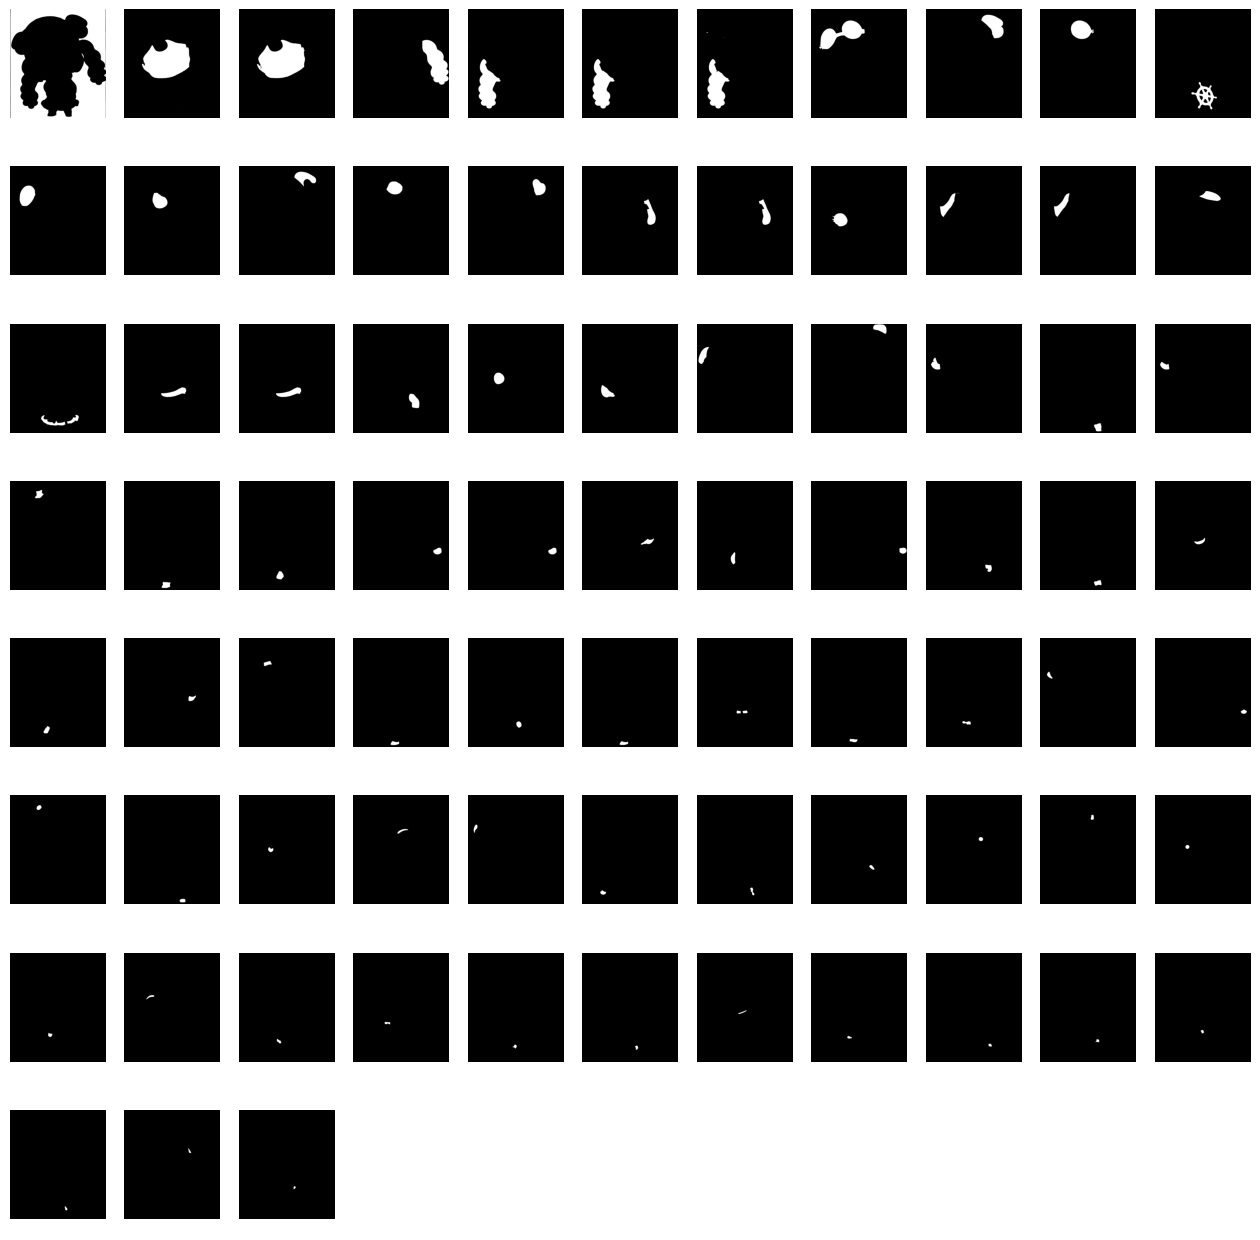

In [ ]:
masks = [
    mask['segmentation']
    for mask
    in sorted(sam_result, key=lambda x: x['area'], reverse=True)
]

sv.plot_images_grid(
    images=masks,
    grid_size=(8, int(len(masks) / 8)+1),
    size=(16, 16)
)

In [ ]:
int(len(masks) / 8)

3

In [ ]:
masks[6]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

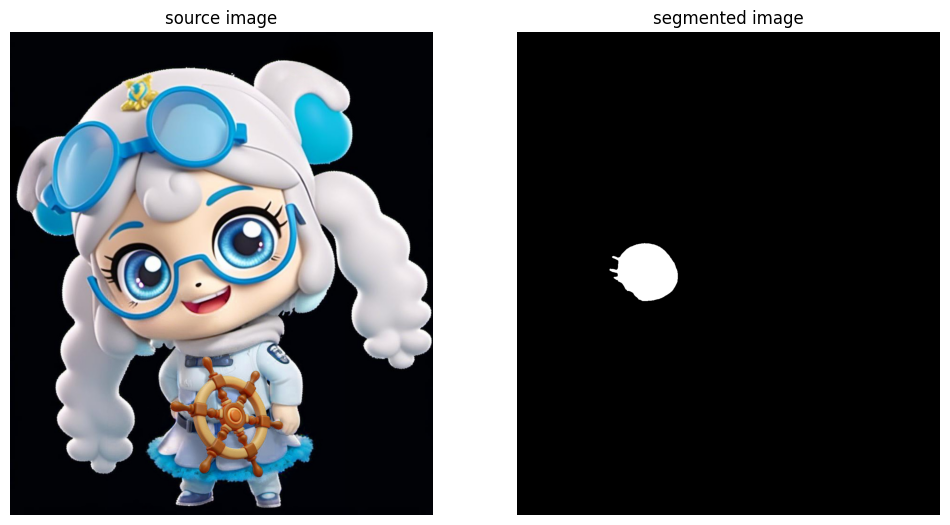

In [ ]:
sv.plot_images_grid(
    images=[image_bgr, masks[18]],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

(465, 433)

In [ ]:
masks[18].shape
image_bgr.shape

(1536, 1344, 3)

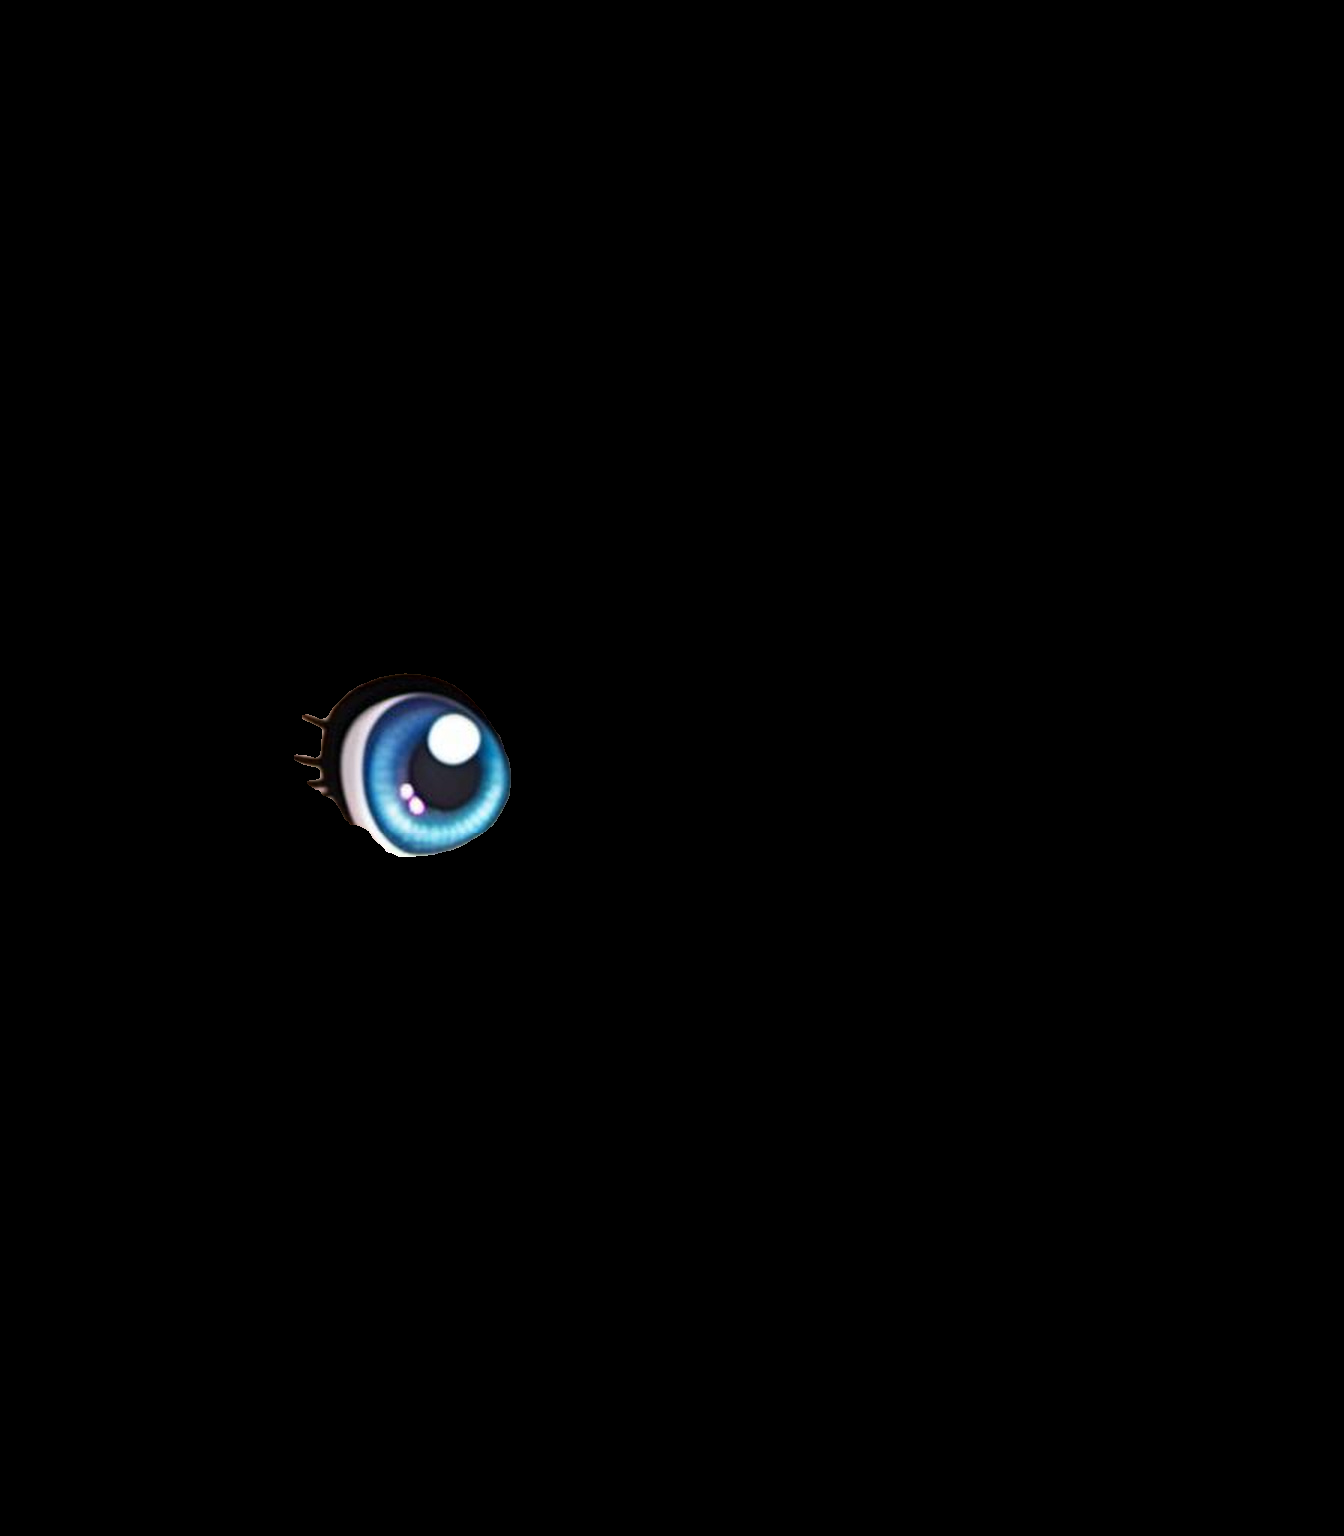

In [ ]:
m = masks[18]

temp = image_bgr.copy()
temp[m==False] = 0
cv2_imshow(temp)

In [ ]:
output_path = "/content/알아핑.png"  # 저장할 경로와 파일명
cv2.imwrite(output_path, temp)

True

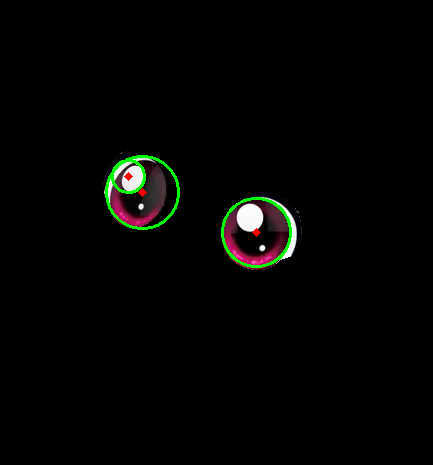

In [ ]:
gimg = cv2.cvtColor(temp,cv2.COLOR_RGB2GRAY)
cimg = temp.copy()

circles =   cv2.HoughCircles(gimg,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2_imshow(cimg)

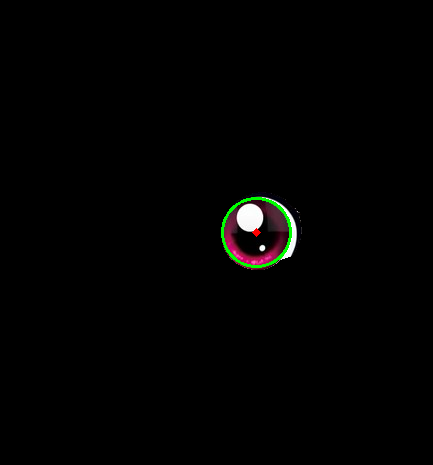

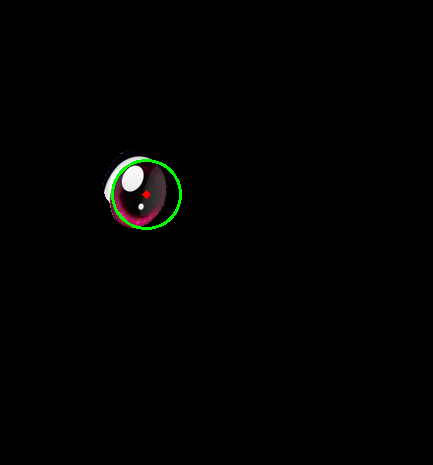

In [ ]:
eye_mask_idx = []
for idx,m in enumerate(masks):
    temp = image_bgr.copy()
    temp[m==False] = 0

    gimg = cv2.cvtColor(temp,cv2.COLOR_RGB2GRAY)
    cimg = temp.copy()
    circles =  cv2.HoughCircles(gimg,cv2.HOUGH_GRADIENT,1,30,
                            param1=50,param2=50,minRadius=10,maxRadius=0)
    if circles is not None:
        eye_mask_idx.append(idx)
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        cv2_imshow(cimg)
    #cv2_imshow(temp)

In [ ]:
eye_mask_idx

[5, 6]

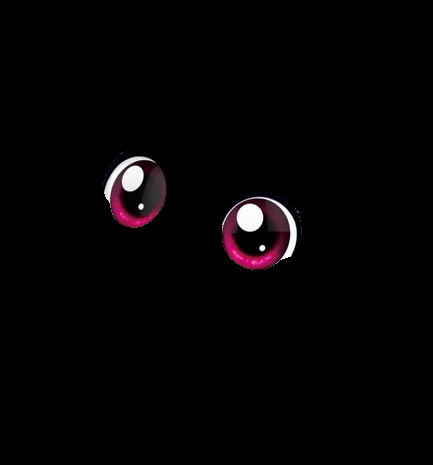

In [ ]:
tot_eye_mask = masks[-1].copy()
tot_eye_mask = False
for i in eye_mask_idx:
    tot_eye_mask += masks[i]
temp = image_bgr.copy()
temp[tot_eye_mask==False] = 0
cv2_imshow(temp)

In [ ]:
########################

In [ ]:
import glob

In [ ]:
f_list = glob.glob("/content/season1/시즌1/*.png")

In [ ]:
for f in f_list:
    print(f"{f} File Processing!!")
    image_bgr = cv2.imread(f)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    sam_result = mask_generator.generate(image_rgb)
    mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

    detections = sv.Detections.from_sam(sam_result=sam_result)
    annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)
    sv.plot_images_grid( images=[image_bgr, annotated_image],grid_size=(1, 2),titles=['source image', 'segmented image'])

    masks = [ mask['segmentation'] for mask in sorted(sam_result, key=lambda x: x['area'], reverse=True) ]

    #sv.plot_images_grid( images=masks,grid_size=(8, int(len(masks) / 8)+1),size=(16, 16))

    ###
    eye_mask_idx = []
    # --> masks에서 앞에 얼굴이 검출되는 경우가 있어서
    #     이 부분은 면적이 크니까..3번째 정도부터..
    for idx,m in enumerate(masks):
        temp = image_bgr.copy()
        temp[m==False] = 0

        gimg = cv2.cvtColor(temp,cv2.COLOR_RGB2GRAY)
        cimg = temp.copy()
        circles =  cv2.HoughCircles(gimg,cv2.HOUGH_GRADIENT,1,30,
                                param1=50,param2=50,minRadius=18,maxRadius=65)

        if circles is not None:
            num_eyes = len(circles)
            print(f"Eyes Number :{num_eyes}")

            eye_mask_idx.append(idx)
            circles = np.uint16(np.around(circles))
            # for i in circles[0,:]:
            #     # draw the outer circle
            #     cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            #     # draw the center of the circle
            #     cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
            # cv2_imshow(cimg)
        #cv2_imshow(temp)
    tot_eye_mask = masks[-1].copy()
    tot_eye_mask = False
    for i in eye_mask_idx:
        tot_eye_mask += masks[i]
    temp = image_bgr.copy()
    temp[tot_eye_mask==False] = 0
    cv2_imshow(temp)
    print("--------------------------------------")

In [ ]:
m = masks[5]+ masks[6]
#m.shape

temp = image_bgr.copy()
temp[m==False] = 0
cv2_imshow(temp)

In [ ]:
dst = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

In [ ]:
np.array(masks[5]).shape

(465, 433)

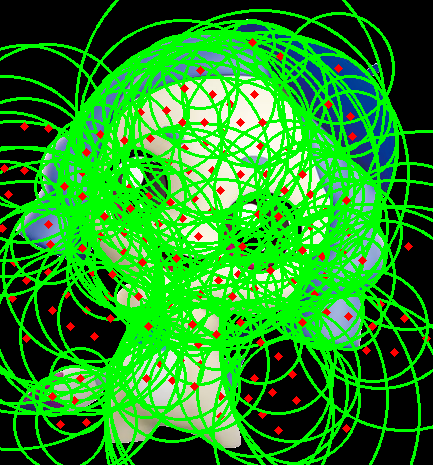

In [ ]:
gimg = cv2.cvtColor(image_bgr,cv2.COLOR_RGB2GRAY)
cimg = image_bgr.copy()
circles =   cv2.HoughCircles(gimg,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2_imshow(cimg)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
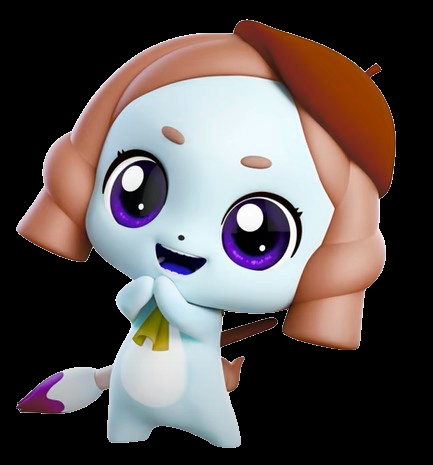

In [ ]:
image_bgr